In [4]:
import tensorflow as tf

model = tf.keras.models.load_model("./model/trained/ms.h5", compile=False)
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 45)             │         2,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         1,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │           525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 40)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 49)             │         2,009 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,209 (35.97 KB)

 Trainable params: 9,209 (35.97 KB)

 Non-trainable params: 0 (0.00 B)

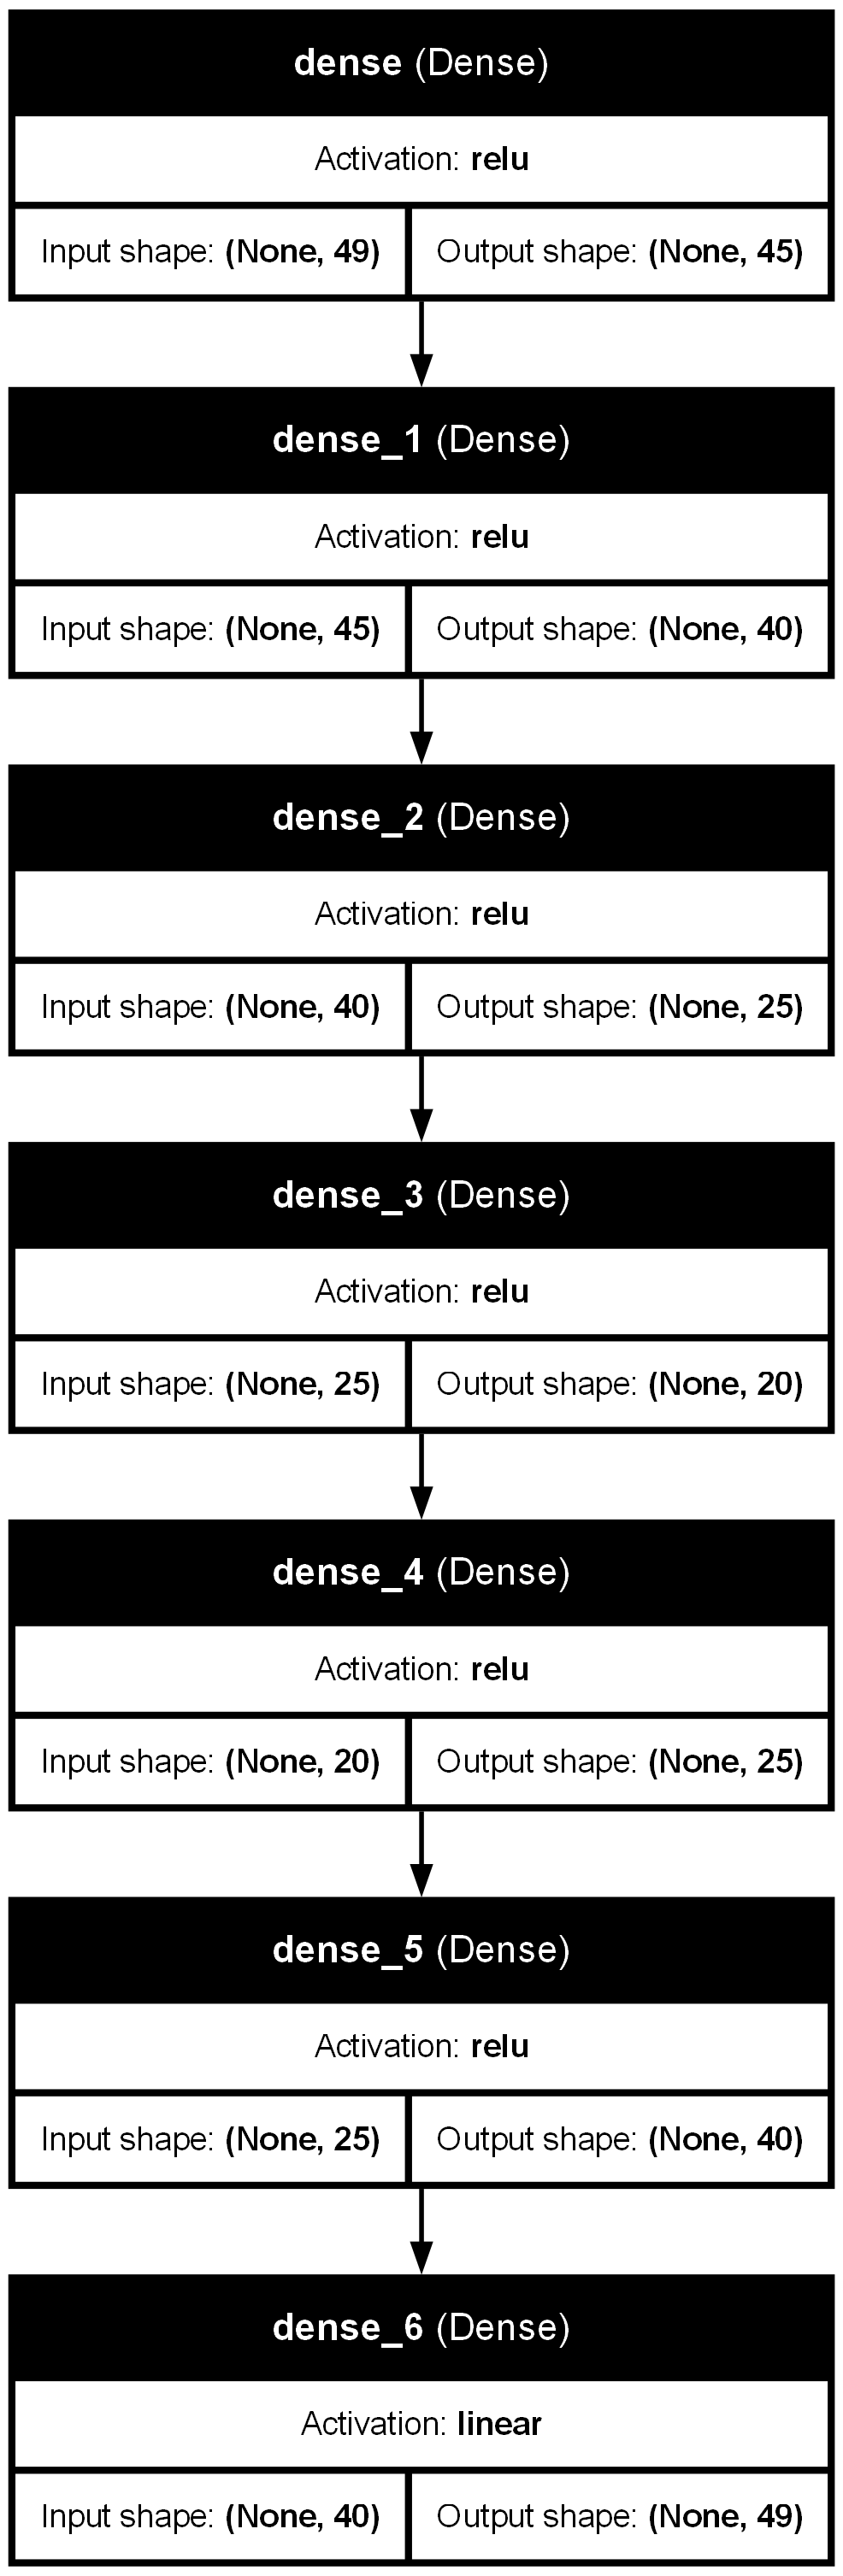

In [5]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Loop through the model layers and rename them to include activation function
# for layer in model.layers:
#     if hasattr(layer, "activation"):  # Check if the layer has an activation attribute
#         activation = (
#             layer.activation.__name__
#         )  # Get the name of the activation function
#         layer._name = (
#             f"{layer.name}_{activation}"  # Rename the layer to include the activation
#         )

# Plot the modified model with the new layer names (including activation functions)
plot_model(
    model, show_shapes=True, show_layer_names=True, show_layer_activations=True
)

In [3]:
for layer in model.layers:
    if hasattr(layer, "activation"):
        print(f"Layer {layer.name} uses activation: {layer.activation.__name__}")

Layer dense uses activation: relu
Layer dense_1 uses activation: relu
Layer dense_2 uses activation: relu
Layer dense_3 uses activation: relu
Layer dense_4 uses activation: relu
Layer dense_5 uses activation: relu
Layer dense_6 uses activation: sigmoid
Layer dense_7 uses activation: linear


In [4]:
for layer in model.layers:
    print(layer.name, layer.__class__.__name__)

dense Dense
dense_1 Dense
dense_2 Dense
dense_3 Dense
dense_4 Dense
dense_5 Dense


In [5]:
# Get the config of a specific layer
# layer = model.get_layer("dense_1")  # Replace with actual layer name
for layer in model.layers:
  print(layer.get_config())

{'name': 'dense', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 1235, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': {'module': 'keras.regularizers', 'class_name': 'L2', 'config': {'l2': 4.999999873689376e-06}, 'registered_name': None}, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'dense_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 768, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None},

In [6]:
for layer in model.layers:
    # print(
    #     f"Layer: {layer.name}, Input Shape: {layer.input_shape}, Output Shape: {layer.output_shape}"
    # )
    print(layer)

<Dense name=dense, built=True>
<Dense name=dense_1, built=True>
<Dense name=dense_2, built=True>
<Dense name=dense_3, built=True>
<Dense name=dense_4, built=True>
<Dense name=dense_5, built=True>


In [7]:
# Get the model configuration
config = model.get_config()
print(config)

{'name': 'sequential', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 49), 'dtype': 'float32', 'sparse': False, 'name': 'input_1'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 1235, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': {'module': 'keras.regularizers', 'class_name': 'L2', 'config': {'l2': 4.999999873689376e-06}, 'registered_name': 

In [8]:
# Model input and output details
print(f"Model input shape: {model.input_shape}")
print(f"Model output shape: {model.output_shape}")

Model input shape: (None, 49)
Model output shape: (None, 49)


In [9]:
import torch.nn as nn

# Define the PyTorch model equivalent to the Keras model
class LargeNNv2(nn.Module):
    def __init__(self):
        super(LargeNNv2, self).__init__()
        self.fc1 = nn.Linear(49, 1235)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(1235, 768)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(768, 532)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(532, 149)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(149, 98)
        self.relu5 = nn.ReLU()
        self.fc6 = nn.Linear(98, 49)  # Output layer

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.relu4(self.fc4(x))
        x = self.relu5(self.fc5(x))
        x = self.fc6(x)
        return x

In [10]:
import torch
import h5py
import numpy as np


# Load Keras model weights
keras_model_path = "./model/collaboratory/ms-13-collab.h5"
h5_file = h5py.File(keras_model_path, "r")

# Initialize PyTorch model
pytorch_model = LargeNNv2()


# Function to transfer weights from Keras to PyTorch
def transfer_weights(h5_file, pytorch_model):
    keras_weights = {}
    for layer in h5_file["model_weights"]:
        if layer == "top_level_model_weights":
            continue
        for weight in h5_file["model_weights"][layer][layer]:
            keras_weights[f"{layer}/{weight}"] = np.array(
                h5_file["model_weights"][layer][layer][weight]
            )

    # Map Keras weights to PyTorch model layers
    with torch.no_grad():
        pytorch_model.fc1.weight.copy_(torch.tensor(keras_weights["dense/kernel:0"].T))
        pytorch_model.fc1.bias.copy_(torch.tensor(keras_weights["dense/bias:0"]))
        pytorch_model.fc2.weight.copy_(
            torch.tensor(keras_weights["dense_1/kernel:0"].T)
        )
        pytorch_model.fc2.bias.copy_(torch.tensor(keras_weights["dense_1/bias:0"]))
        pytorch_model.fc3.weight.copy_(
            torch.tensor(keras_weights["dense_2/kernel:0"].T)
        )
        pytorch_model.fc3.bias.copy_(torch.tensor(keras_weights["dense_2/bias:0"]))
        pytorch_model.fc4.weight.copy_(
            torch.tensor(keras_weights["dense_3/kernel:0"].T)
        )
        pytorch_model.fc4.bias.copy_(torch.tensor(keras_weights["dense_3/bias:0"]))
        pytorch_model.fc5.weight.copy_(
            torch.tensor(keras_weights["dense_4/kernel:0"].T)
        )
        pytorch_model.fc5.bias.copy_(torch.tensor(keras_weights["dense_4/bias:0"]))
        pytorch_model.fc6.weight.copy_(
            torch.tensor(keras_weights["dense_5/kernel:0"].T)
        )
        pytorch_model.fc6.bias.copy_(torch.tensor(keras_weights["dense_5/bias:0"]))


# Perform the weight transfer
transfer_weights(h5_file, pytorch_model)

# Save PyTorch model
pytorch_model_path = "./model/collaboratory/ms-13-collab.pth"
torch.save(pytorch_model.state_dict(), pytorch_model_path)

print(f"PyTorch model has been saved to {pytorch_model_path}")

PyTorch model has been saved to ./model/collaboratory/ms-13-collab.pth


In [11]:
from torchinfo import summary
# from torchsummary import summary as summary2



# Load the saved PyTorch model and run torchinfo's summary


loaded_model = LargeNNv2()


loaded_model.load_state_dict(torch.load(pytorch_model_path, weights_only=True))


loaded_model.eval()



# Display model summary
summary(
    loaded_model,
    input_size=(256, 1, 49),
    verbose=0,
    col_width=16,
    col_names=["input_size", "output_size", "num_params", "params_percent"],
    row_settings=["var_names"],
)

Layer (type (var_name))                  Input Shape      Output Shape     Param #          Param %
LargeNNv2 (LargeNNv2)                    [256, 1, 49]     [256, 1, 49]     --                    --
├─Linear (fc1)                           [256, 1, 49]     [256, 1, 1235]   61,750             4.06%
├─ReLU (relu1)                           [256, 1, 1235]   [256, 1, 1235]   --                    --
├─Linear (fc2)                           [256, 1, 1235]   [256, 1, 768]    949,248           62.49%
├─ReLU (relu2)                           [256, 1, 768]    [256, 1, 768]    --                    --
├─Linear (fc3)                           [256, 1, 768]    [256, 1, 532]    409,108           26.93%
├─ReLU (relu3)                           [256, 1, 532]    [256, 1, 532]    --                    --
├─Linear (fc4)                           [256, 1, 532]    [256, 1, 149]    79,417             5.23%
├─ReLU (relu4)                           [256, 1, 149]    [256, 1, 149]    --                    --
